In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pydicom
from pydicom import dcmread
import pylibjpeg
import cv2

In [2]:
file = Path("../data/images/negative/ADHLFHFDI/2023-11-17 111547/IMG-0001-00012.dcm")
os.path.exists(file)

True

In [3]:
dicom = pydicom.read_file(file)
data = dicom.pixel_array

print(data.shape)

(512, 512)


In [37]:
help(dicom)

Help on FileDataset in module pydicom.dataset object:

class FileDataset(Dataset)
 |  FileDataset(filename_or_obj: Union[str, bytes, os.PathLike, BinaryIO, pydicom.filebase.DicomFileLike], dataset: Union[ForwardRef('Dataset'), MutableMapping[pydicom.tag.BaseTag, Union[pydicom.dataelem.DataElement, pydicom.dataelem.RawDataElement]]], preamble: Optional[bytes] = None, file_meta: Optional[ForwardRef('FileMetaDataset')] = None, is_implicit_VR: bool = True, is_little_endian: bool = True) -> None
 |  
 |  An extension of :class:`Dataset` to make reading and writing to
 |  file-like easier.
 |  
 |  Attributes
 |  ----------
 |  preamble : str or bytes or None
 |      The optional DICOM preamble prepended to the :class:`FileDataset`, if
 |      available.
 |  file_meta : FileMetaDataset or None
 |      The Dataset's file meta information as a :class:`FileMetaDataset`,
 |      if available (``None`` if not present).
 |      Consists of group ``0x0002`` elements.
 |  filename : str or None
 |  

In [38]:
dicom.file_meta

(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.44.5554020.7739647.15551.1700216150.36
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.804.114118.3
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2023.1'

In [4]:
dicom = dcmread(file)
data = dicom.pixel_array

print(data.shape)

(512, 512)


In [5]:
type(data)

numpy.ndarray

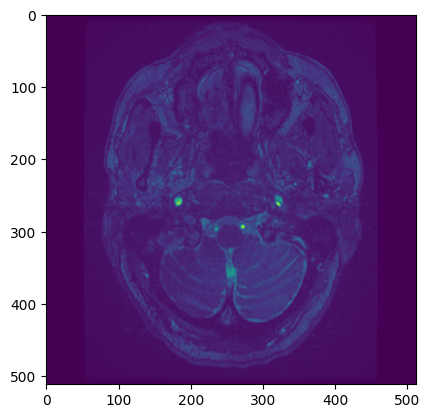

In [17]:
plt.imshow(data)

In [18]:
f = os.listdir(file.parent)
sorted(f, key= lambda x: int(x.split("-")[-1].split(".")[0]))

['IMG-0001-00001.dcm',
 'IMG-0001-00002.dcm',
 'IMG-0001-00003.dcm',
 'IMG-0001-00004.dcm',
 'IMG-0001-00005.dcm',
 'IMG-0001-00006.dcm',
 'IMG-0001-00007.dcm',
 'IMG-0001-00008.dcm',
 'IMG-0001-00009.dcm',
 'IMG-0001-00010.dcm',
 'IMG-0001-00011.dcm',
 'IMG-0001-00012.dcm',
 'IMG-0001-00013.dcm',
 'IMG-0001-00014.dcm',
 'IMG-0001-00015.dcm',
 'IMG-0001-00016.dcm',
 'IMG-0001-00017.dcm',
 'IMG-0001-00018.dcm',
 'IMG-0001-00019.dcm',
 'IMG-0001-00020.dcm',
 'IMG-0001-00021.dcm',
 'IMG-0001-00022.dcm',
 'IMG-0001-00023.dcm',
 'IMG-0001-00024.dcm',
 'IMG-0001-00025.dcm',
 'IMG-0001-00026.dcm',
 'IMG-0001-00027.dcm',
 'IMG-0001-00028.dcm',
 'IMG-0001-00029.dcm',
 'IMG-0001-00030.dcm',
 'IMG-0001-00031.dcm',
 'IMG-0001-00032.dcm',
 'IMG-0001-00033.dcm',
 'IMG-0001-00034.dcm',
 'IMG-0001-00035.dcm',
 'IMG-0001-00036.dcm',
 'IMG-0001-00037.dcm',
 'IMG-0001-00038.dcm',
 'IMG-0001-00039.dcm',
 'IMG-0001-00040.dcm',
 'IMG-0001-00041.dcm',
 'IMG-0001-00042.dcm',
 'IMG-0001-00043.dcm',
 'IMG-0001-

In [19]:
def get_3D_data(file: str) -> np.ndarray:
    files = os.listdir(file.parent)
    files = sorted(files, key=lambda x: int(x.split("-")[-1].split(".")[0]))
    
    data = []
    for f in files:
        new_f = file.parent / f
        new_f_data = pydicom.read_file(new_f)
        data.append(new_f_data.pixel_array)
    
    return np.array(data)


In [20]:
f1 = get_3D_data(file)

In [21]:
f1.shape

(116, 512, 512)

In [22]:
f1[1,1,1]

0

In [23]:
for i, a in enumerate(f1):
    print(a)
    if i > 2:
        break
a.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(512, 512)

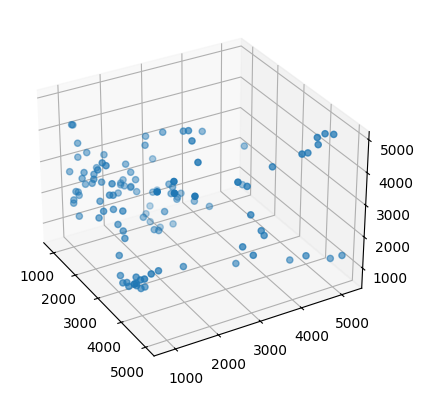

In [24]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
ax.view_init(30, -30)
ax.scatter(f1[:, 258, 258], f1[56, 198:314, 258], f1[56, 258, 198:314])
plt.show()

In [46]:
file_loc = Path("../data/dataset.csv")

df = pd.read_csv(file_loc)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  7497 non-null   object
 1   label     7497 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [48]:
df.head()

,location,label
0,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
1,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
2,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
3,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
4,../data/images/postive/DHFDLAFH/2023-10-30 124...,1


In [49]:
df.duplicated().sum()

0

In [50]:
df.describe(include="all")

,location,label
count,7497,7497.000000
unique,7497,NaN
top,../data/images/postive/DHFDLAFH/2023-10-30 124...,NaN
freq,1,NaN
mean,NaN,0.335334
std,NaN,0.472139
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [15]:
df.shape

(7499, 2)

In [16]:
df["label"].value_counts()

label
0    4984
1    2515
Name: count, dtype: int64

In [17]:
df[df["label"] == 1]

,location,label
0,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
1,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
2,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
3,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
4,../data/images/postive/DHFDLAFH/2023-10-30 124...,1
...,...,...
2510,../data/images/postive/DHAJFVIF/1.2.840.113619...,1
2511,../data/images/postive/DHAJFVIF/1.2.840.113619...,1
2512,../data/images/postive/DHAJFVIF/1.2.840.113619...,1
2513,../data/images/postive/DHAJFVIF/1.2.840.113619...,1


In [22]:
df.location.apply(lambda x: True if x.split(".")[-1] != "dcm" else False).sum()

0

In [ ]:
df[df["label"] == 1]["location"].apply(lambda x: x.split("/")[2] in pos_tags).sum()

2515

In [51]:
for i, img in enumerate(df["location"].values):
    try:
        img_read = pydicom.read_file(img)
        img = img_read.pixel_array
    except Exception as exc:
        print(f"Error raised on {i}")
        print(f"Error message: {exc}")
    if i % 10 == 0:
        print(f"No {i}")

No 0
No 10
No 20
No 30
No 40
No 50
No 60
No 70
No 80
No 90
No 100
No 110
No 120
No 130
No 140
No 150
No 160
No 170
No 180
No 190
No 200
No 210
No 220
No 230
No 240
No 250
No 260
No 270
No 280
No 290
No 300
No 310
No 320
No 330
No 340
No 350
No 360
No 370
No 380
No 390
No 400
No 410
No 420
No 430
No 440
No 450
No 460
No 470
No 480
No 490
No 500
No 510
No 520
No 530
No 540
No 550
No 560
No 570
No 580
No 590
No 600
No 610
No 620
No 630
No 640
No 650
No 660
No 670
No 680
No 690
No 700
No 710
No 720
No 730
No 740
No 750
Error raised on 751
Error message: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
No 760
No 770
No 780
No 790
No 800
No 810
No 820
No 830
No 840
No 850
No 860
No 870
No 880
No 890
No 900
No 910
No 920
No 930
No 940
No 950
No 960
No 970
No 980
No 990
No 1000
No 1010
No 1020
No 1030
No 1040
No 1050
No 1060
No 1070
No 1080
No 1090
No 1100
No 1110
No 1120
No 1130
No 1140
No 1150
No 1160
No 1170
No 1

In [52]:
df.iloc[751, 0]

'../data/images/postive/DHFDLAFH/2023-10-30 124401/IMG-0010-00001.dcm'

In [41]:
data.file_meta

(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced SR Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.428.3.2831188992.974.1698217868.351
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.804.114118.3
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2023.1'

In [40]:
data = pydicom.read_file('../data/images/postive/DHFDLAFH/2023-10-30 124401/IMG-0010-00001.dcm', force=True)

i = data.pixel_array

i

AttributeError: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset

<Axes: xlabel='label'>

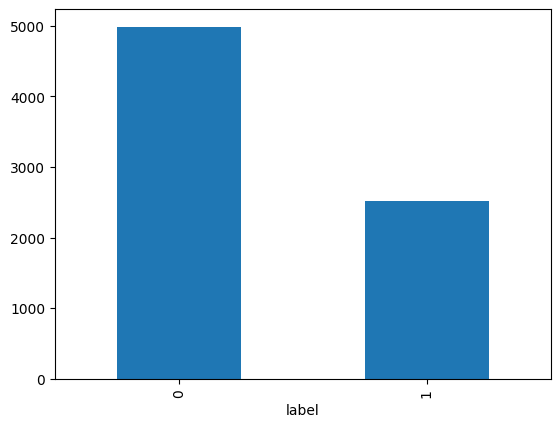

In [ ]:
df["label"].value_counts().plot.bar()

# plt.bar(counts.index, counts)

In [6]:
import torch
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms

from PIL import Image

In [63]:
from torch.utils.data import Dataset
from typing import Callable

In [ ]:
class NewDataset(Dataset):
    def __init__(self, data_file: str, transform: Callable = None):
        self._data

In [53]:
dataset = "../data/images"

transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(224),
    transforms.Grayscale(1),
    transforms.ToTensor()
])

    

def pydicom_loader(file):
    # dicom = dcmread(file)
    dicom = pydicom.read_file(file)
    data = dicom.pixel_array
    return Image.fromarray(data)

dataloader = DatasetFolder(dataset, loader=pydicom_loader, transform=transform, extensions=[".dcm"])

In [ ]:
n = 0
pos = 0
y_labels = []
for x, y in dataloader:
    y_labels.append(y)
    n += 1
    if y == 1:
        pos += 1
        if pos % 10 == 0:
            print("Yes :", n)
    if n % 50 == 0:
        print(y_labels)
    #     print("Number: ", n)


In [64]:
len(y_labels)

7497

In [57]:
np.sum(y_labels)

2514

In [36]:
from torch.utils.data.sampler import SubsetRandomSampler


3

In [71]:
[i for i, x in enumerate(y_labels) if x == 1]

[4983,
 4984,
 4985,
 4986,
 4987,
 4988,
 4989,
 4990,
 4991,
 4992,
 4993,
 4994,
 4995,
 4996,
 4997,
 4998,
 4999,
 5000,
 5001,
 5002,
 5003,
 5004,
 5005,
 5006,
 5007,
 5008,
 5009,
 5010,
 5011,
 5012,
 5013,
 5014,
 5015,
 5016,
 5017,
 5018,
 5019,
 5020,
 5021,
 5022,
 5023,
 5024,
 5025,
 5026,
 5027,
 5028,
 5029,
 5030,
 5031,
 5032,
 5033,
 5034,
 5035,
 5036,
 5037,
 5038,
 5039,
 5040,
 5041,
 5042,
 5043,
 5044,
 5045,
 5046,
 5047,
 5048,
 5049,
 5050,
 5051,
 5052,
 5053,
 5054,
 5055,
 5056,
 5057,
 5058,
 5059,
 5060,
 5061,
 5062,
 5063,
 5064,
 5065,
 5066,
 5067,
 5068,
 5069,
 5070,
 5071,
 5072,
 5073,
 5074,
 5075,
 5076,
 5077,
 5078,
 5079,
 5080,
 5081,
 5082,
 5083,
 5084,
 5085,
 5086,
 5087,
 5088,
 5089,
 5090,
 5091,
 5092,
 5093,
 5094,
 5095,
 5096,
 5097,
 5098,
 5099,
 5100,
 5101,
 5102,
 5103,
 5104,
 5105,
 5106,
 5107,
 5108,
 5109,
 5110,
 5111,
 5112,
 5113,
 5114,
 5115,
 5116,
 5117,
 5118,
 5119,
 5120,
 5121,
 5122,
 5123,
 5124,
 5125,

In [77]:
a = [1, 3, 4, 5, 6, 7]

In [75]:
for x in [3, 4, 7]: a.remove(x)

In [80]:
b = np.array([a]).take(np.array([1, 3, 5]))

b

array([3, 5, 7])

In [76]:
a

[1, 5, 6]

In [ ]:
import time

In [ ]:
def stratify_split(labels: list, val_size: int, test_size: int, train_size: int):
    """
    Split the data in a uniform manner retaining same positive-negative distribution
    """
    data_size = len(labels)
    # get indices for the postive and negative examples
    pos_indices =[i for i, x in enumerate(labels) if x ==1]
    neg_indices =[i for i, x in enumerate(labels) if x ==0]
    # fraction of the positive values in the dataset
    pos_fraction = np.sum(y_labels) / data_size

    result = []

    for size in [val_size, test_size, train_size]:
        # Calculate the number of values for the val set and positve examples in it
        size_ = int(np.floor(size*data_size))

        pos_val_size = int(np.floor(pos_fraction*size_))
        # randomly select the values from the separated indices
        pos_val = np.random.choice(pos_indices, pos_val_size)
        neg_val = np.random.choice(neg_indices, (val_size_ - pos_val_size))

        # remove the selected values from the pos_indices and neg_indices
        pos_indices = list(set(pos_indices).difference(set(pos_val)))
        neg_indices = list(set(neg_indices).difference(set(neg_val)))

        


Time taken for the run: 0.0018566039998404449 ms


In [ ]:
a